# **Edge Detection**



In [1]:
!pip install opencv-python

***Edge detection***

Sobel:
X Gradient
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

Y Gradient
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

**Exercise 1:** Complete TODO tags

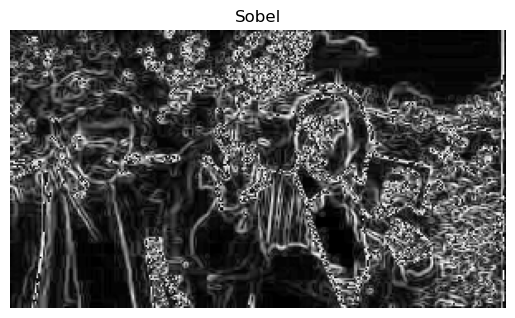

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image has been successfully loaded
if img is None:
    print('Error loading the image')
    quit()

# Calculate horizontal and vertical gradients
dx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
dy = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# Calculate magnitude
magn = cv.magnitude(dx, dy)

# Convert from float to uint to display the result
sobel = np.uint8(magn)

# Show the result
plt.imshow(sobel, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.show()

**Exercise 2 (Prewit filter):**
We can use different kernels to implement gradients using convolution. Create a prewitt filter based on the following code, performing the corresponding convolutions of Prewitt filters horizontally and vertically, and completing the parts indicated with TODO:

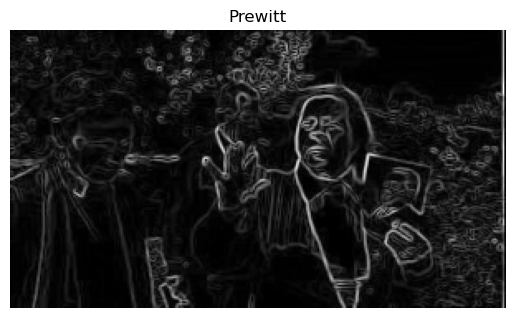

In [2]:
import cv2 as cv
import numpy as np
import argparse
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('lena.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image has been successfully loaded
if img is None:
    print('Error loading the image ')
    quit()

# Calculate horizontal gradient by convolution
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

# Calculate vertical gradient by convolution
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# Convert both gradients to float
sobelx = sobelx.astype(np.float32)
sobely = sobely.astype(np.float32)

# Calculate the magnitude and save it in the variable magn
magn = np.sqrt(sobelx**2 + sobely**2)

# Normalize to be able to convert from float to uint without having out-of-range values
magn = magn - magn.min()
magn = magn / magn.max() * 255

# Convert from float to uint to visualize the result and save it in prewitt
prewitt = magn.astype(np.uint8)

plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt')
plt.axis('off')
plt.show()


**Exercise 3:** Modify the code to perform histogram equalization, like OpenCV's equalizeHist function does, but manually.

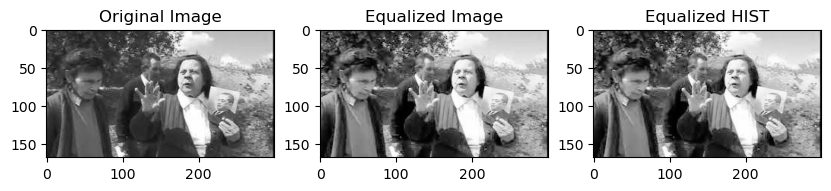

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def manual_histogram_equalization(img):
    # Compute the histogram of the image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize the CDF in the range [0, 255]
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Interpolate the new pixel values using the normalized CDF
    img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized)
    img_equalized = img_equalized.reshape(img.shape)

    # Scale the pixel values to the range [0, 255]
    img_equalized = ((img_equalized - img_equalized.min()) /
                     (img_equalized.max() - img_equalized.min()) * 255).astype(np.uint8)

    return img_equalized

img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Perform manual histogram equalization
equalized_img = manual_histogram_equalization(img)

# Using equalizeHist
equalized_hist = cv2.equalizeHist(img)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.subplot(1, 3, 3)
plt.imshow(equalized_hist, cmap='gray')
plt.title('Equalized HIST')

plt.show()



***Noise Reduction***

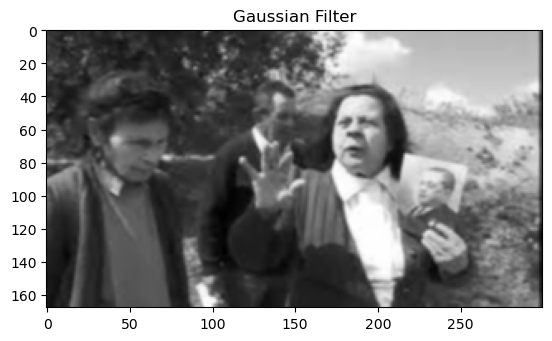

In [4]:
#Gaussian Filter
gauss = cv.GaussianBlur(img, (3,3), 0) # Gaussian filter of 3x3 pixels and standard deviation of  0
#Show
plt.imshow(gauss, cmap='gray')
plt.title('Gaussian Filter')

plt.show()

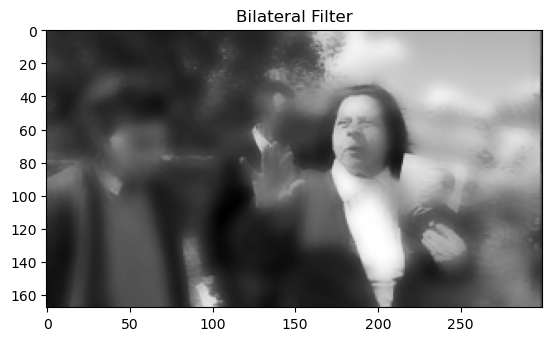

In [5]:
#Bilateral Filter
bilat = cv.bilateralFilter(img, 15, 80, 80) #  Bilateral filter with 15 pixels of diameter and intensity of 80.

plt.imshow(bilat, cmap='gray')
plt.title('Bilateral Filter')

plt.show()

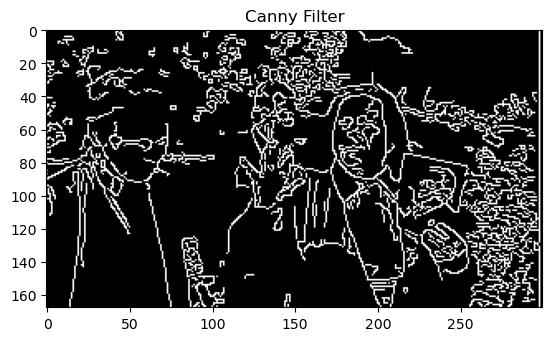

In [6]:
#Canny Filter
canny = cv.Canny(img, 100, 200) #Canny filter with min-max thresholds (hysteresis) 100 and 200
plt.imshow(canny, cmap='gray')
plt.title('Canny Filter')

plt.show()

**Exercise 4:** Let's do an exercise using all the previous filters. In this case, we'll start with the following code that you need to download, completing the instructions indicated with TODO. This is an exercise to cartoonize an image.

In [1]:
import cv2 as cv
import numpy as np
import argparse

# Load the image
img = cv.imread('twingo.jpg')

# Check if the image has been successfully read
if img is None:
    print('Error loading the image')
    quit()

########## EDGES ############

# Apply a median filter of size 7x7 to smooth the image
imgSmooth = cv.medianBlur(img, 7)

# Use Canny to detect edges with lower threshold 50 and upper threshold 150
edges = cv.Canny(imgSmooth, 50, 150)

# Dilate the edges. For this, apply dilate with a 2x2 square filter
kernel = np.ones((2, 2), np.uint8)
imgCanny = cv.dilate(edges, kernel)

# Scale the resulting values to the range [0...1] and invert them.
# This operation implicitly converts the result (imgCannyf) to float64
imgCannyf = 1 - (imgCanny / 255)

# Apply a 5x5 pixel Gaussian filter with standard deviation 0 on the previous result
edgesf = cv.GaussianBlur(imgCannyf, (5, 5), 0)

# Show the edges
cv.imshow('Edges', edgesf)

########## COLOR ############

# On the original image (img), apply a bilateral filter with a diameter of 9 and thresholds 150 and 150
imgBF = cv.bilateralFilter(img, 9, 150, 150)

# Truncate the colors. In this case, use a value of 40; the higher, the more "cartoonized"
div = 40
quantized = (imgBF // div) * div

# Show the color result
cv.imshow('Color', quantized)

# Convert it to float64 for the following operations
resultf = quantized.astype(np.float64)

########## MERGE EDGES AND COLOR ############

# Use merge to create a 3-channel image with the edges
imgCanny3c = cv.merge((edgesf, edgesf, edgesf))

# Multiply the color and edges matrices to get the final image
resultf = cv.multiply(resultf, imgCanny3c)

# Convert the previous result to an 8-bit image (uint8)
result = resultf.astype(np.uint8)

# Show the final image and save it
cv.imshow('Result', result)
cv.waitKey(0)

Error loading the image


[ WARN:0@0.008] global loadsave.cpp:248 findDecoder imread_('twingo.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/median_blur.dispatch.cpp:283: error: (-215:Assertion failed) !_src0.empty() in function 'medianBlur'


: 

# **Line Detection**

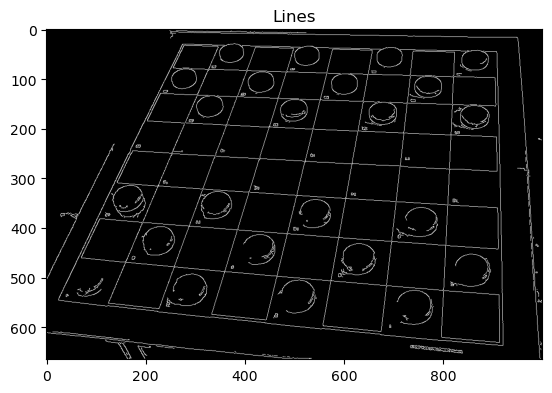

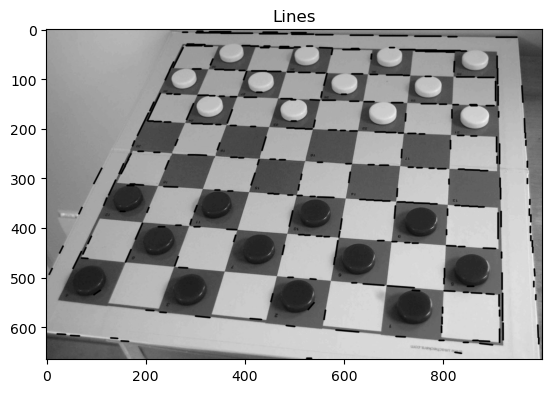

In [2]:
import cv2 as cv
import argparse
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('damas.jpg', cv.IMREAD_GRAYSCALE)


# Check if the image has been successfully loaded
if img is None:
    print('Error loading the image')
    quit()

# Detect edges
edges = cv.Canny(img, 20, 100, 3)
plt.imshow(edges, cmap='gray')
plt.title('Lines')

plt.show()

# Execute Hough
lines = cv.HoughLinesP(edges, 1, np.pi/180, 20, None, 10, 0)

# Draw the resulting lines on a copy of the original image
hough = img.copy()
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv.line(hough, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv.LINE_AA)

plt.imshow(hough, cmap='gray')
plt.title('Lines')

plt.show()

**Exercise 5:** Use HoughCircles to detect only the pieces of the image 'damas.jpg'

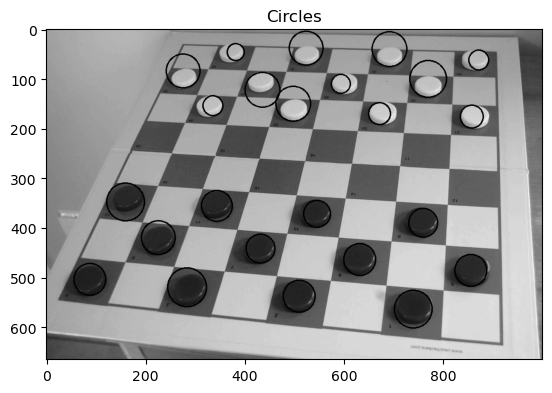

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('damas.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image has been successfully loaded
if img is None:
    print('Error loading the image')
    quit()

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(img, (5, 5), 0)

# Apply HoughCircles to detect circles
circles = cv.HoughCircles(blurred, cv.HOUGH_GRADIENT, dp=1, minDist=40, param1=40, param2=30, minRadius=5, maxRadius=95)

# Draw the detected circles on a copy of the original image
output = img.copy()
if circles is not None:
    circles = np.round(circles[0, :]).astype(int)
    for (x, y, r) in circles:
        cv.circle(output, (x, y), r, (0, 255, 0), 2)

# Display the result
plt.imshow(output, cmap='gray')
plt.title('Circles')
plt.show()


# **Corner Detection**

**Exercise 6:** Code the Corner Harris algorithm

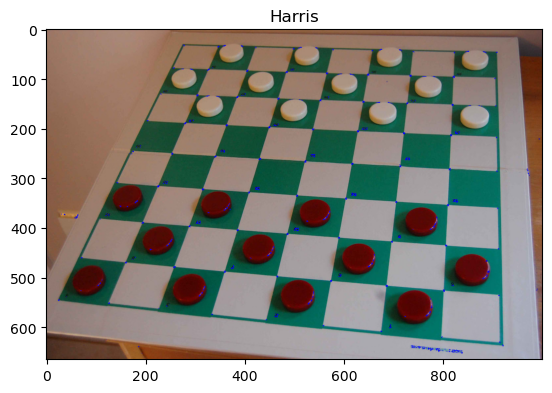

In [6]:
# FILEPATH: /Users/daniel/Desktop/Master IA/TÉCNICAS DE VISIÓN ARTIFICIAL/Prácticas/P3/Tema_3a_TVA.ipynb
import cv2 as cv
import argparse
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('damas.jpg', cv.IMREAD_GRAYSCALE)
img = np.float32(img)
# Check if the image has been successfully loaded
if img is None:
    print('Error loading the image')
    quit()

# Detect corners with Harris. Parameters: blockSize=2, apertureSize=3, k=0.04.
# (save in Harris)
harris = cv.cornerHarris(img,blockSize= 2,ksize= 3, k=0.04)

src = cv.imread('damas.jpg', cv.IMREAD_COLOR)
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)


src[harris >= 10000] = [0, 0, 255]

plt.imshow(src, cmap='gray')
plt.title('Harris')
plt.show()